In [ ]:
# Data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, 
    ConfusionMatrixDisplay, balanced_accuracy_score
)

# Neural network
import torch

# Gradient boosting
import xgboost as xgb

## Introduction to Machine Learning

**Import the data on Myocardial infarction complications from the US Irvin Machine Learning Repository**

In [143]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 
  
# metadata 
print(myocardial_infarction_complications.metadata) 
  
# variable information 
print(myocardial_infarction_complications.variables)

{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'ID'

## Part 1: Data processing

**For the y variable remove all columns that are not what we are trying to predict and encode patient outcome in binary (0=survives, 1=death)**

In [3]:
# Remove all columns in y that are not LET_IS
y = y['LET_IS']

# Turn this binary by turning all values greater than 0 into 1 (i.e., fatal vs. non-fatal)
y = y.apply(lambda x: 1 if x > 0 else 0)

**For the x variable correctly store data by appropriate data type**

In [4]:
# Variables that should be categorical
categorical_columns = ["DLIT_AG", "INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "GB", "SEX", "IBS_NASL", "SIM_GIPERT"
                       "ZSN_A", "nr_11", "nr_01", "nr_02", "nr_03", "nr_04", "nr_07", "nr_08", "np_01", 
                       "np_04", "np_05", "np_07", "np_08", "np_09", "np_10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01"
                       "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "O_L_POST", "K_SH_POST"
                       "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P", "ritm_ecg_p_01",
                       "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", 
                       "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", 
                       "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07"
                       "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", 
                       "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "GIPER_NA"
                       "TIME_B_S", "R_AB_1_n", "R_AB_2_n", "R_AB_3_n", "NA_KB", "NOT_NA_KB", "LID_KB", "NITR_S", "NOT_NA_1_n",
                        "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n", "FIBR_PREDS", 
                        "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", "ZSN", "REC_IM", "P_IM_STEN"]

# Convert categorical variables to pandas categorical type
for col in categorical_columns:
    if col in X.columns:
        X[col] = X[col].astype('category')

/var/folders/n5/_f2xjmkj39gb7s0th_6lyk9w0000gn/T/ipykernel_57304/464572143.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


In [5]:
# Determine data type for each variable (
data_types = X.dtypes
continuous = data_types[data_types == 'float64']
categorical = data_types[data_types == 'category']

print(f"Continuous variables: {continuous.shape[0]}")
print(f"Categorical variables: {categorical.shape[0]}")

Continuous variables: 27
Categorical variables: 84


In [6]:
# See how much (%) data is missing for each feature
missing_percent = X.isnull().mean().sort_values(ascending=False)
print(missing_percent)

KFK_BLOOD     0.997647
IBS_NASL      0.957647
D_AD_KBRIG    0.632941
S_AD_KBRIG    0.632941
NOT_NA_KB     0.403529
                ...   
zab_leg_06    0.004118
NA_R_1_n      0.002941
INF_ANAM      0.002353
IM_PG_P       0.000588
SEX           0.000000
Length: 111, dtype: float64


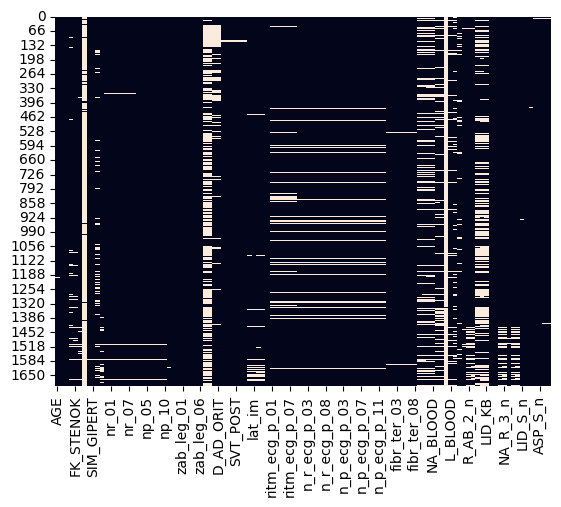

In [7]:
sns.heatmap(X.isnull(), cbar=False)
plt.show()

**Remove columns with less than 50% of data available**

In [8]:
# Calculate the percentage of missing data for each column
missing_percent = X.isnull().mean()

# Find columns with more than 50% missing data
columns_to_drop = missing_percent[missing_percent > 0.5].index

# Drop those columns from X
X = X.drop(columns=columns_to_drop, axis=1)

**Steps to data imputation**

1. Split x and y into training, validation and testing (these will then be imputed to avoid data leakage)
3. Conduct imputation via random forest to accomodate to different variable types and to capture non-linear relationships
5. Round all values to the nearest integer
6. Bring categorical values back into the original range

In [9]:
# Split data into training, validation and test sets (70% training, of which 30% is used for validation and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [10]:
# List all columns that contain 2 or less distinct values (determine binary)
binary_columns = X_train.columns[(X_train.nunique() <= 2)].tolist()
print(binary_columns)

['SEX', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'T

In [11]:
# List all variables that contain between 3 and 7 distinct values (determine categorical)
categorical_columns = X_train.columns[(X_train.nunique() > 2) & (X_train.nunique() <= 7)].tolist()
print(categorical_columns)

['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'ZSN_A', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n']


In [12]:
# Print all variables that contain more than 7 distinct values (determine continuous)
continuous_columns = X_train.columns[(X_train.nunique() > 7)].tolist()
print(continuous_columns)

['AGE', 'DLIT_AG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S']


In [ ]:
# Function to impute binary and continuous variables together
def impute_combined_data(data, binary_cols, continuous_cols):
    # Reset the index to prevent errors
    data = data.reset_index(drop=True)

    # Create a column-specific logic for binary columns
    def round_binary_columns(data_array, binary_col_indices):
        for idx in binary_col_indices:
            data_array[:, idx] = (data_array[:, idx] > 0.5).astype(int)
        return data_array

    # Combine all columns for imputation
    all_cols = binary_cols + continuous_cols
    binary_indices = [all_cols.index(col) for col in binary_cols]

    # Create a unified imputer using RandomForestRegressor
    imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42), max_iter=10)

    # Fit and transform the entire dataset
    imputed_array = imputer.fit_transform(data[all_cols])

    # Ensure binary columns are rounded to 0 or 1
    imputed_array = round_binary_columns(imputed_array, binary_indices)

    # Convert back to DataFrame
    imputed_data = pd.DataFrame(imputed_array, columns=all_cols)
    return imputed_data

# Specify binary and continuous columns
binary_cols = ['SEX', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05',
               'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02',
               'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST',
               'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07',
               'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06',
               'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05',
               'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12',
               'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
               'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
               'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

continuous_cols = ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'ZSN_A', 'ant_im', 'lat_im', 'inf_im',
                    'post_im', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n',
                    'NOT_NA_2_n', 'NOT_NA_3_n', 'AGE', 'DLIT_AG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S']

# Apply unified imputation to each dataset
X_train_imputed = impute_combined_data(X_train, binary_cols, continuous_cols)
X_val_imputed = impute_combined_data(X_val, binary_cols, continuous_cols)
X_test_imputed = impute_combined_data(X_test, binary_cols, continuous_cols)

/Users/gianjaeger/Desktop/ML/ML/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/gianjaeger/Desktop/ML/ML/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/gianjaeger/Desktop/ML/ML/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
# Round all continuous variables to the nearest integer
X_train_imputed = X_train_imputed.round()
X_val_imputed = X_val_imputed.round()
X_test_imputed = X_test_imputed.round()

# Clip categorical variables to their valid categories
def clip_categorical_variables(imputed_data, categorical_cols, reference_data):

    clipped_data = imputed_data.copy()

    for col in categorical_cols:
        # Extract valid categories from the reference dataset
        valid_categories = reference_data[col].dropna().unique()

        # Convert the column to an ordered categorical type
        ordered_categories = pd.Categorical(valid_categories, ordered=True)
        min_category = ordered_categories.min()
        max_category = ordered_categories.max()

        # Clip imputed values to the valid range of categories
        clipped_data[col] = clipped_data[col].round().clip(lower=min_category, upper=max_category)

    return clipped_data

---

## Part 2: Neural Network

For reference relevant data frames at this point are: 
- X_train_imputed
- X_val_imputed
- X_test_imputed
- y_train
- y_val
- y_test

For hyperparameter tuning, random search will be prefered.

In [24]:
%load_ext tensorboard

In [25]:
pip install "numpy<2"

  Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl (20.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.1
    Uninstalling numpy-2.2.1:
      Successfully uninstalled numpy-2.2.1

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
from models.random_search import random_search_hyperparameters

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_imputed.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_imputed.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Prepare tensors (replace these with your actual data)
input_size = X_train_tensor.shape[1]  # Input size for the model

# Perform random search for hyperparameter tuning
results = random_search_hyperparameters(
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_val_tensor=X_val_tensor,
    y_val_tensor=y_val_tensor,
    input_size=input_size,
    num_epochs=20,
    n_trials=20,
)

# Access the best model and its hyperparameters
best_model = results["best_model"]
best_hyperparams = results["best_hyperparams"]
best_val_balanced_accuracy = results["best_val_balanced_accuracy"]

# Output the results
print("\nBest Model Hyperparameters:")
print(best_hyperparams)
print(f"Best Validation Balanced Accuracy: {best_val_balanced_accuracy:.4f}")

Trial 1/20
Validation Balanced Accuracy: 0.5456
Trial 2/20
Validation Balanced Accuracy: 0.5000
Trial 3/20
Validation Balanced Accuracy: 0.6867
Trial 4/20
Validation Balanced Accuracy: 0.7218
Trial 5/20
Validation Balanced Accuracy: 0.7233
Trial 6/20
Validation Balanced Accuracy: 0.7314
Trial 7/20
Validation Balanced Accuracy: 0.5000
Trial 8/20
Validation Balanced Accuracy: 0.5928
Trial 9/20
Validation Balanced Accuracy: 0.5244
Trial 10/20
Validation Balanced Accuracy: 0.5000
Trial 11/20
Validation Balanced Accuracy: 0.7159
Trial 12/20
Validation Balanced Accuracy: 0.5610
Trial 13/20
Validation Balanced Accuracy: 0.6560
Trial 14/20
Validation Balanced Accuracy: 0.5000
Trial 15/20
Validation Balanced Accuracy: 0.5000
Trial 16/20
Validation Balanced Accuracy: 0.5000
Trial 17/20
Validation Balanced Accuracy: 0.6305
Trial 18/20
Validation Balanced Accuracy: 0.5000
Trial 19/20
Validation Balanced Accuracy: 0.5928
Trial 20/20
Validation Balanced Accuracy: 0.5000

Best Model Hyperparameters:


In [ ]:
from models.train_neural_network import train_neural_network 

# Call model (architecture defined in .py file based on random search)
trained_model = train_neural_network(
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_val_tensor=X_val_tensor,
    y_val_tensor=y_val_tensor,
    num_epochs=20,
    batch_size=32,
    lr=0.01,
    pos_weight=4.5
)

Epoch 1/20, Training Loss: 1.1773, Training Accuracy: 0.5090, Training Recall: 0.4658, Training Precision: 0.1704, Training F1: 0.2495, Training Balanced Accuracy: 0.4920, Validation Loss: 0.9851, Validation Accuracy: 0.1625, Validation Recall: 1.0000, Validation Precision: 0.1206, Validation F1: 0.2152, Validation Balanced Accuracy: 0.5269
Epoch 2/20, Training Loss: 1.1307, Training Accuracy: 0.6555, Training Recall: 0.3288, Training Precision: 0.2025, Training F1: 0.2507, Training Balanced Accuracy: 0.5268, Validation Loss: 0.9249, Validation Accuracy: 0.7899, Validation Recall: 0.6341, Validation Precision: 0.3023, Validation F1: 0.4094, Validation Balanced Accuracy: 0.7221
Epoch 3/20, Training Loss: 1.0581, Training Accuracy: 0.8007, Training Recall: 0.5548, Training Precision: 0.4451, Training F1: 0.4939, Training Balanced Accuracy: 0.7039, Validation Loss: 0.8917, Validation Accuracy: 0.6891, Validation Recall: 0.7317, Validation Precision: 0.2308, Validation F1: 0.3509, Validati

In [ ]:
# Save the entire model (architecture + weights)
torch.save(trained_model, "models/myocardial_infarction_model.pth")

In [114]:
# Load the entire model (architecture + weights)
model = torch.load("models/myocardial_infarction_model.pth")

In [115]:
model.eval()  # This ensures the model behaves correctly during inference

Sequential(
  (0): Linear(in_features=107, out_features=64, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

In [71]:
# Convert test data to PyTorch tensor
X_test_tensor = torch.tensor(X_test_imputed.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Make predictions on the test set
with torch.no_grad():  # Disable gradient calculation for evaluation
    test_logits = trained_model(X_test_tensor)  # Get raw logits
    test_probabilities = torch.sigmoid(test_logits)  # Convert logits to probabilities
    test_predictions = (test_probabilities > 0.5).float()  # Convert probabilities to binary predictions

In [98]:
# Convert tensors to NumPy arrays for metric calculations
y_test_pred = test_predictions.cpu().numpy()
y_test_proba = test_probabilities.cpu().numpy()
y_test_true = y_test_tensor.cpu().numpy()

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test_true, y_test_pred)
test_precision = precision_score(y_test_true, y_test_pred)
test_recall = recall_score(y_test_true, y_test_pred)
test_f1 = f1_score(y_test_true, y_test_pred)
test_auc = roc_auc_score(y_test_true, y_test_proba)
test_balanced_accuracy = balanced_accuracy_score(y_test_true, y_test_pred)

# Print test metrics
print("Test Metrics for Loaded Model:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Balanced Accuracy: {test_balanced_accuracy:.4f}")
print(f"ROC AUC: {test_auc:.4f}")

Test Metrics for Loaded Model:
Accuracy: 0.7255
Precision: 0.3586
Recall: 0.8452
F1 Score: 0.5035
Balanced Accuracy: 0.7736
ROC AUC: 0.8486


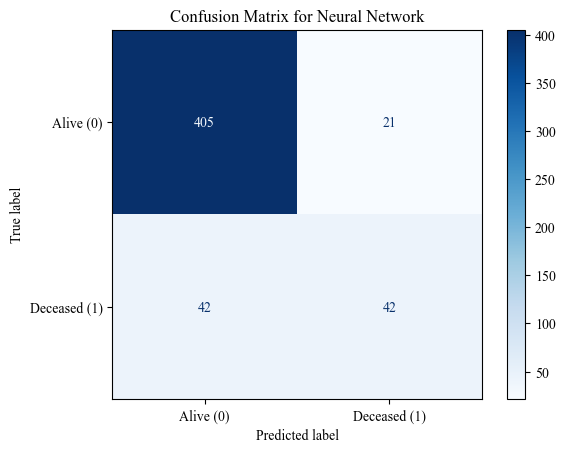

In [55]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_true, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Alive (0)", "Deceased (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Neural Network")
plt.show()

## Part 3: Logistic Regression and XGBoost

In [57]:
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train_imputed, y_train)

/Users/gianjaeger/Desktop/ML/ML/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [58]:
# Predictions on the test set
y_val_pred = log_reg.predict(X_test_imputed)
y_val_proba = log_reg.predict_proba(X_test_imputed)[:, 1]

# Calculate validation metrics
val_accuracy = accuracy_score(y_test, y_val_pred)
val_precision = precision_score(y_test, y_val_pred)
val_recall = recall_score(y_test, y_val_pred)
val_f1 = f1_score(y_test, y_val_pred)
val_auc = roc_auc_score(y_test, y_val_proba)
val_balanced_accuracy = balanced_accuracy_score(y_test, y_val_pred)

# Print validation metrics
print("Validation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print(f"Balanced Accuracy: {val_balanced_accuracy:.4f}")
print(f"ROC AUC: {val_auc:.4f}")

Validation Metrics:
Accuracy: 0.8824
Precision: 0.7222
Recall: 0.4643
F1 Score: 0.5652
Balanced Accuracy: 0.7145
ROC AUC: 0.8614


Confusion Matrix:
[[411  15]
 [ 45  39]]


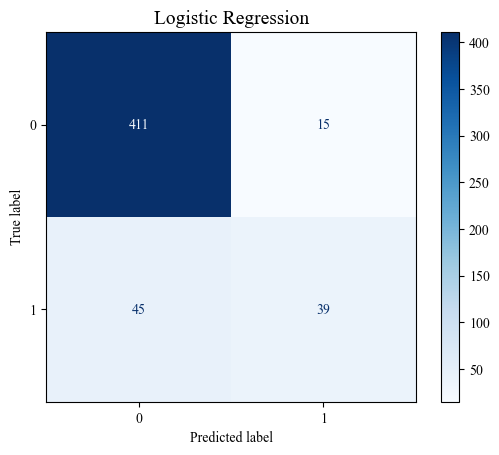

In [59]:
# Predictions on the test set
y_test_pred = log_reg.predict(X_test_imputed)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Set Times New Roman font for Matplotlib
plt.rcParams["font.family"] = "Times New Roman"

# Visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression", fontsize=14)  # Adjust font size if needed
plt.show()

**XGBoost**

Note the script for XGBoost should be run on Google Collab if it crashes the kernel

In [ ]:
# Create an XGBoost model to compare with logistic regression and neural network

# Adjust hyperparameters to avoid excessive memory use
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    max_depth=6,          # Tree depth
    n_estimators=50,     # Number of trees
    subsample=0.8,        # Use 80% of samples for each tree
    colsample_bytree=0.8, # Use 80% of features for each tree
    learning_rate=0.1,    # Default learning rate
    enable_categorical=True  # Enable categorical support for experimental features
)

# Train the model on the training set
xgb_model.fit(X_train_imputed, y_train)

# Predictions on the validation set
y_val_pred_xgb = xgb_model.predict(X_val_imputed)
y_val_proba_xgb = xgb_model.predict_proba(X_val_imputed)[:, 1]

# Calculate validation metrics
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
val_precision_xgb = precision_score(y_val, y_val_pred_xgb)
val_recall_xgb = recall_score(y_val, y_val_pred_xgb)
val_f1_xgb = f1_score(y_val, y_val_pred_xgb)
val_auc_xgb = roc_auc_score(y_val, y_val_proba_xgb)
val_balanced_accuracy_xgb = balanced_accuracy_score(y_val, y_val_pred_xgb)

print("Validation Metrics for XGBoost:")
print(f"Accuracy: {val_accuracy_xgb:.4f}")
print(f"Precision: {val_precision_xgb:.4f}")
print(f"Recall: {val_recall_xgb:.4f}")
print(f"F1 Score: {val_f1_xgb:.4f}")
print(f"Balanced Accuracy: {val_balanced_accuracy_xgb:.4f}")
print(f"ROC AUC: {val_auc_xgb:.4f}")

Validation Metrics for XGBoost:
Accuracy: 0.8992
Precision: 0.6087
Recall: 0.3415
F1 Score: 0.4375
Balanced Accuracy: 0.6565
ROC AUC: 0.8740


In [ ]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_val_pred_xgb)

# Visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

## Part 4: PCA

In [133]:
# Assuming X_train_imputed, X_val_imputed, and X_test_imputed are already loaded as DataFrames.
# Standardize the data using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform train, validation, and test datasets
X_train_standardized = scaler.fit_transform(X_train_imputed)
X_val_standardized = scaler.transform(X_val_imputed)
X_test_standardized = scaler.transform(X_test_imputed)

# Convert the standardized data back to DataFrames for easy manipulation and visualization if needed
X_train_standardized = pd.DataFrame(X_train_standardized, columns=X_train_imputed.columns)
X_val_standardized = pd.DataFrame(X_val_standardized, columns=X_val_imputed.columns)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=X_test_imputed.columns)

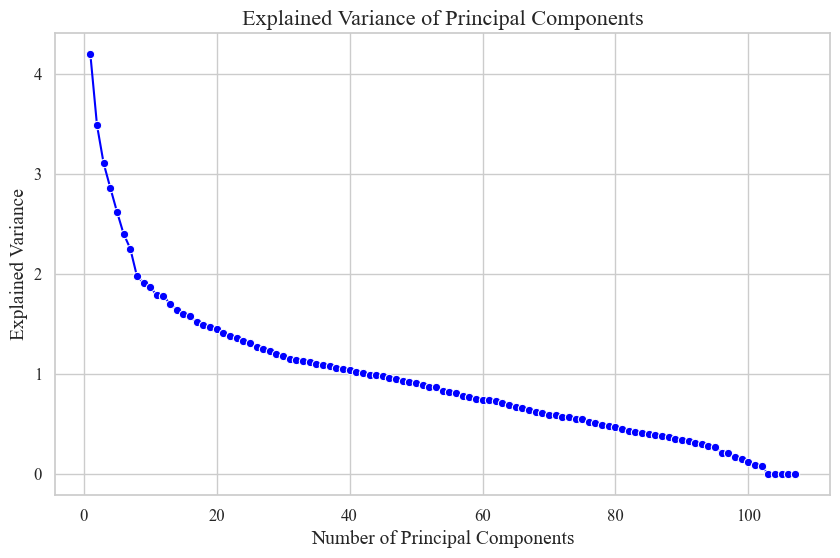

In [136]:
# Set the font to Times New Roman explicitly for Seaborn plots
sns.set_theme(style="whitegrid", rc={"font.family": "Times New Roman"})

# Perform PCA on the standardized training data
pca = PCA()
pca.fit(X_train_standardized)

# Prepare data for plotting
explained_variance = pca.explained_variance_
components = range(1, len(explained_variance) + 1)

# Plot the explained variance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=components, y=explained_variance, marker='o', color='blue')
plt.xlabel('Number of Principal Components', fontsize=14, fontname='Times New Roman')
plt.ylabel('Explained Variance', fontsize=14, fontname='Times New Roman')
plt.title('Explained Variance of Principal Components', fontsize=16, fontname='Times New Roman')
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.show()